In [1]:
#Part 2A)
import numpy as np 
import matplotlib.pyplot as plt  
from scipy.fft import fft, fftfreq

# Defining functions
def C_gc(r,p_gc):
    """ 
    Gaspari-Cohn piecewise correlation function
    
    params
        r : float - Sampling distance 
        p_gc : float - Certain distance defining the three sections of the piecewise relationship
    """
    x = r/p_gc
    if x<=1:
        return -(1/4)*x**5 + (1/2)*x**4 + (5/8)*x**3 - (5/3)*x**2 + 1
    if x<=2:
        return (1/12)*x**5 - (1/2)*x**4 + (5/8)*x**3 + (5/3)*x**2 - 5*x + 4 - (2/3)*x**(-1) 
    else:
        return 0

def C_g(r,L_g):
    """
    Gaussian function

    params
        r : float - Sampling distance
        L_g : float - Lg/L = 0.08 L is maybe the cutoff radius 2*p_cg but who knows
    """ 
    return np.exp(-(r**2/(2*L_g**2)))

In [2]:
# Problem setup 
L_g = 1.
p_gc = 2*L_g
L = L_g/0.08

r = np.linspace(0,L,2000) # 2000 points to sample
gaspari_cohn = [C_gc(r_i,p_gc) for r_i in r] 
gaussian = C_g(r,L_g)

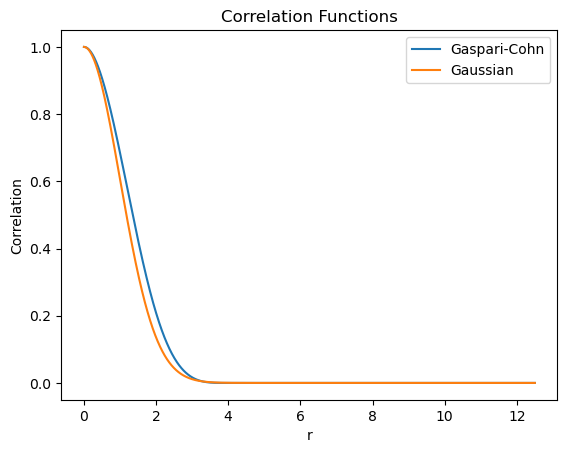

In [3]:
# Plot the Gaussian and corresponding Gaspari-Cohn functions
plt.figure() 
plt.plot(r,gaspari_cohn,label='Gaspari-Cohn') 
plt.plot(r,gaussian, label='Gaussian')
plt.xlabel('r')
plt.ylabel('Correlation')
plt.legend()
plt.title('Correlation Functions')
plt.show()

In [4]:
# Calculate the derivatives using numpy finite differences
dc_dr = dict(zip(r,np.diff(gaspari_cohn)))
dg_dr = np.diff(gaussian)

dc_dr = np.diff(gaspari_cohn) / np.diff(r)
dg_dr = np.diff(gaussian) / np.diff(r)

r_mid = (r[:-1] + r[1:]) / 2 # Midpoints of r

# Evaluate closest point to when L_g = sqrt(10/3), this will be when r = 2*sqrt(10/3)
r_c1 = 2*np.sqrt(10/3) 
i1 = np.argmin(np.abs(r_mid - r_c1))
print('Derivative dc_gc/dr at r = 2*sqrt(10/3): ', dc_dr[i1])
print('Derivative dc_g /dr at r = 2*sqrt(10/3): ', dg_dr[i1])
print()
r_c2 = 2*np.sqrt(10/3) 
i2 = np.argmin(np.abs(r_mid - r_c2))
print('Derivative dc_gc/dr at r = 0:            ', dc_dr[i2])
print('Derivative dc_g /dr at r = 0:            ', dg_dr[i2])
print()
print('The following statements will return true if the')
print('derivative at the points for both functions matches')
print('the derivative at r=0 (within floating point accuracy):')
print('______________________________________________________')
print('For the Gaspari-Cohn function: ', dc_dr[i2] == dc_dr[i1])
print('For the Gaussian function:     ', dg_dr[i2] == dg_dr[i1])


Derivative dc_gc/dr at r = 2*sqrt(10/3):  -0.0031613094139863866
Derivative dc_g /dr at r = 2*sqrt(10/3):  -0.004690969936455796

Derivative dc_gc/dr at r = 0:             -0.0031613094139863866
Derivative dc_g /dr at r = 0:             -0.004690969936455796

The following statements will return true if the
derivative at the points for both functions matches
the derivative at r=0 (within floating point accuracy):
______________________________________________________
For the Gaspari-Cohn function:  True
For the Gaussian function:      True


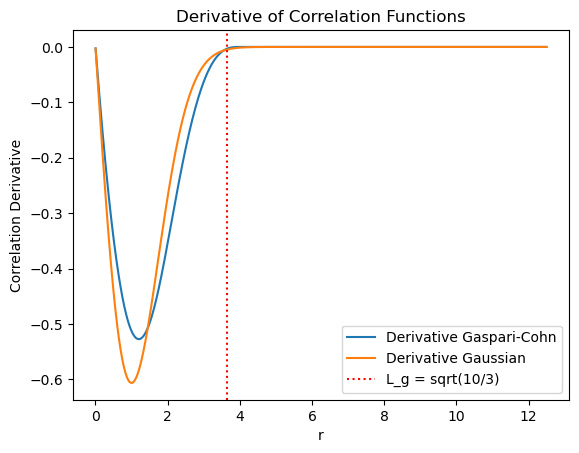

In [5]:
# To get a sense of what this looks like (not explicitly necessary)
plt.figure() 
plt.plot(r_mid,dc_dr,label='Derivative Gaspari-Cohn') 
plt.plot(r_mid,dg_dr, label='Derivative Gaussian') 
plt.xlabel('r')
plt.ylabel('Correlation Derivative')
plt.axvline(x=2*np.sqrt(10/3),label='L_g = sqrt(10/3)',linestyle='dotted',color='red')
plt.legend()
plt.title('Derivative of Correlation Functions')
plt.show()

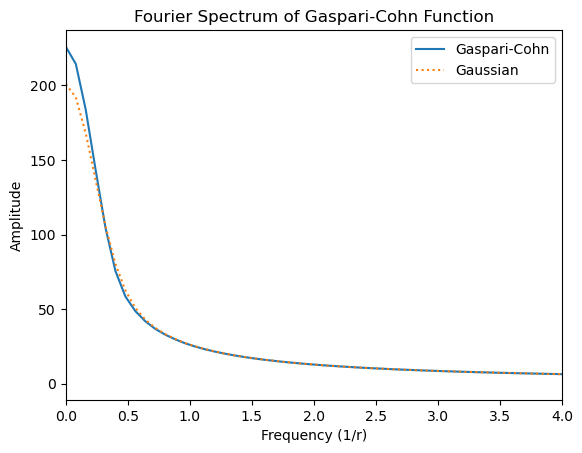

In [6]:
# Part 2c
# scipy.fft is a useful library for calculating the spectra of a fucntion with ample documentation

Y_g = fft(gaspari_cohn)  # Fourier coefficients
Y_c = fft(gaussian) # Out of curiosity
freqs = fftfreq(len(r), d=(r[1] - r[0]))  # Corresponding frequencies

plt.plot(freqs[:len(freqs)//2], np.abs(Y_g[:len(Y_g)//2]),label='Gaspari-Cohn')  # Only positive frequencies
plt.plot(freqs[:len(freqs)//2], np.abs(Y_c[:len(Y_c)//2]),label='Gaussian',linestyle='dotted')  # Only positive frequencies

plt.xlabel("Frequency (1/r)")
plt.ylabel("Amplitude")
plt.legend()
plt.title("Fourier Spectrum of Gaspari-Cohn Function")
plt.xlim([0,4])
plt.show()